 ## Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [79]:
# import the Library
import pandas as pd
import numpy as np
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
import spacy
nlp=spacy.load('en_core_web_sm', disable=['ner'])

In [80]:
mask=pd.read_csv('Elon_musk.csv',encoding='latin1')

In [81]:
mask.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [82]:
mask.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [83]:
mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [84]:
mask.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [85]:
mask.drop(['Unnamed: 0'],axis=1,inplace=True)

In [86]:
Mask=mask

# Data Cleaning

In [87]:
import numpy as np
mask.replace(r'^\s*$', np.nan, regex=True,inplace=True)
mask.dropna(axis = 0, how = 'any', inplace = True)

In [88]:
mask.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
print('escape seq removed')

escape seq removed


In [89]:
mask['Text']=mask['Text'].str.encode('ascii', 'ignore').str.decode('ascii')
print('non-ascii data removed')

non-ascii data removed


In [90]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [91]:
def remove_punctuations(Text):
    import string
    for punctuation in string.punctuation:
        Text = Text.replace(punctuation, '')
    return Text
mask['Text']=mask['Text'].apply(remove_punctuations)

In [92]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 9.1 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [93]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kjlja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjlja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [95]:
def custom_remove_stopwords(Text, is_lower_case=False):
    tokens = tokenizer.tokenize(Text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
mask['Text']=mask['Text'].apply(custom_remove_stopwords)

In [96]:
def remove_special_characters(Text):
    Text = re.sub('[^a-zA-z0-9\s]', '', Text)
    return Text
mask['Text']=mask['Text'].apply(remove_special_characters)

In [97]:
def remove_html(Text):
    import re
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r' ', Text)
mask['Text']=mask['Text'].apply(remove_html)

In [98]:
def cleanse(word):
    rx = re.compile(r'\D*\d')
    if rx.match(word):
        return ''
    return word
def remove_alphanumeric(strings):
    nstrings = [" ".join(filter(None, (
    cleanse(word) for word in string.split()))) 
    for string in strings.split()]
    str1 = ' '.join(nstrings)
    return str1
mask['Text']=mask['Text'].apply(remove_alphanumeric)

# World cloud

In [99]:
Mask = [Text.strip() for Text in Mask.Text] # remove both the leading and the trailing characters
Mask = [Text for Text in Mask if Text] # removes empty strings, because they are considered in Python as False
Mask[0:10]   


['Im alien',
 'IDAACarmack Ray tracing Cyberpunk HDR nextlevel tried',
 'joerogan Spotify Great interview',
 'Doge underestimated',
 'teslacn Congratulations Tesla China amazing execution last year next even',
 'Happy New Year Ox',
 'Frodo underdogeAll thought would failHimself httpstcozGxJFDzzrM',
 'OwenSparks flcnhvy  Haha thanks',
 'flcnhvy  Indeed Tweets definitely not represent realworld time allocation',
 'entertaining outcome likely']

In [100]:
# Joining the list into one string/text
text = ' '.join(Mask)
text 

'Im alien IDAACarmack Ray tracing Cyberpunk HDR nextlevel tried joerogan Spotify Great interview Doge underestimated teslacn Congratulations Tesla China amazing execution last year next even Happy New Year Ox Frodo underdogeAll thought would failHimself httpstcozGxJFDzzrM OwenSparks flcnhvy  Haha thanks flcnhvy  Indeed Tweets definitely not represent realworld time allocation entertaining outcome likely GiveDirectly sent agree Clubhouse kanyewest geoffkeighley UnrealEngine getting real Bought Dogecoin lil X toddler hodler JoshManMode definitely issues sentencing seems bit high freewalletorg Thanks fixing freewalletorg Please unlock account AstroJordy true power haha freewalletorg crypto wallet wont give private keys avoided costs freewalletorg app sucks RT SpaceX NASA selected Falcon Heavy launch first two elements lunar Gateway together one mission ajtourville Yes RationalEtienne Adamklotz predict cash flow reasonably well Starlink IPO RationalEtienne Adamklotz Starlink staggeringly d

### Import packages

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

### Generate wordcloud

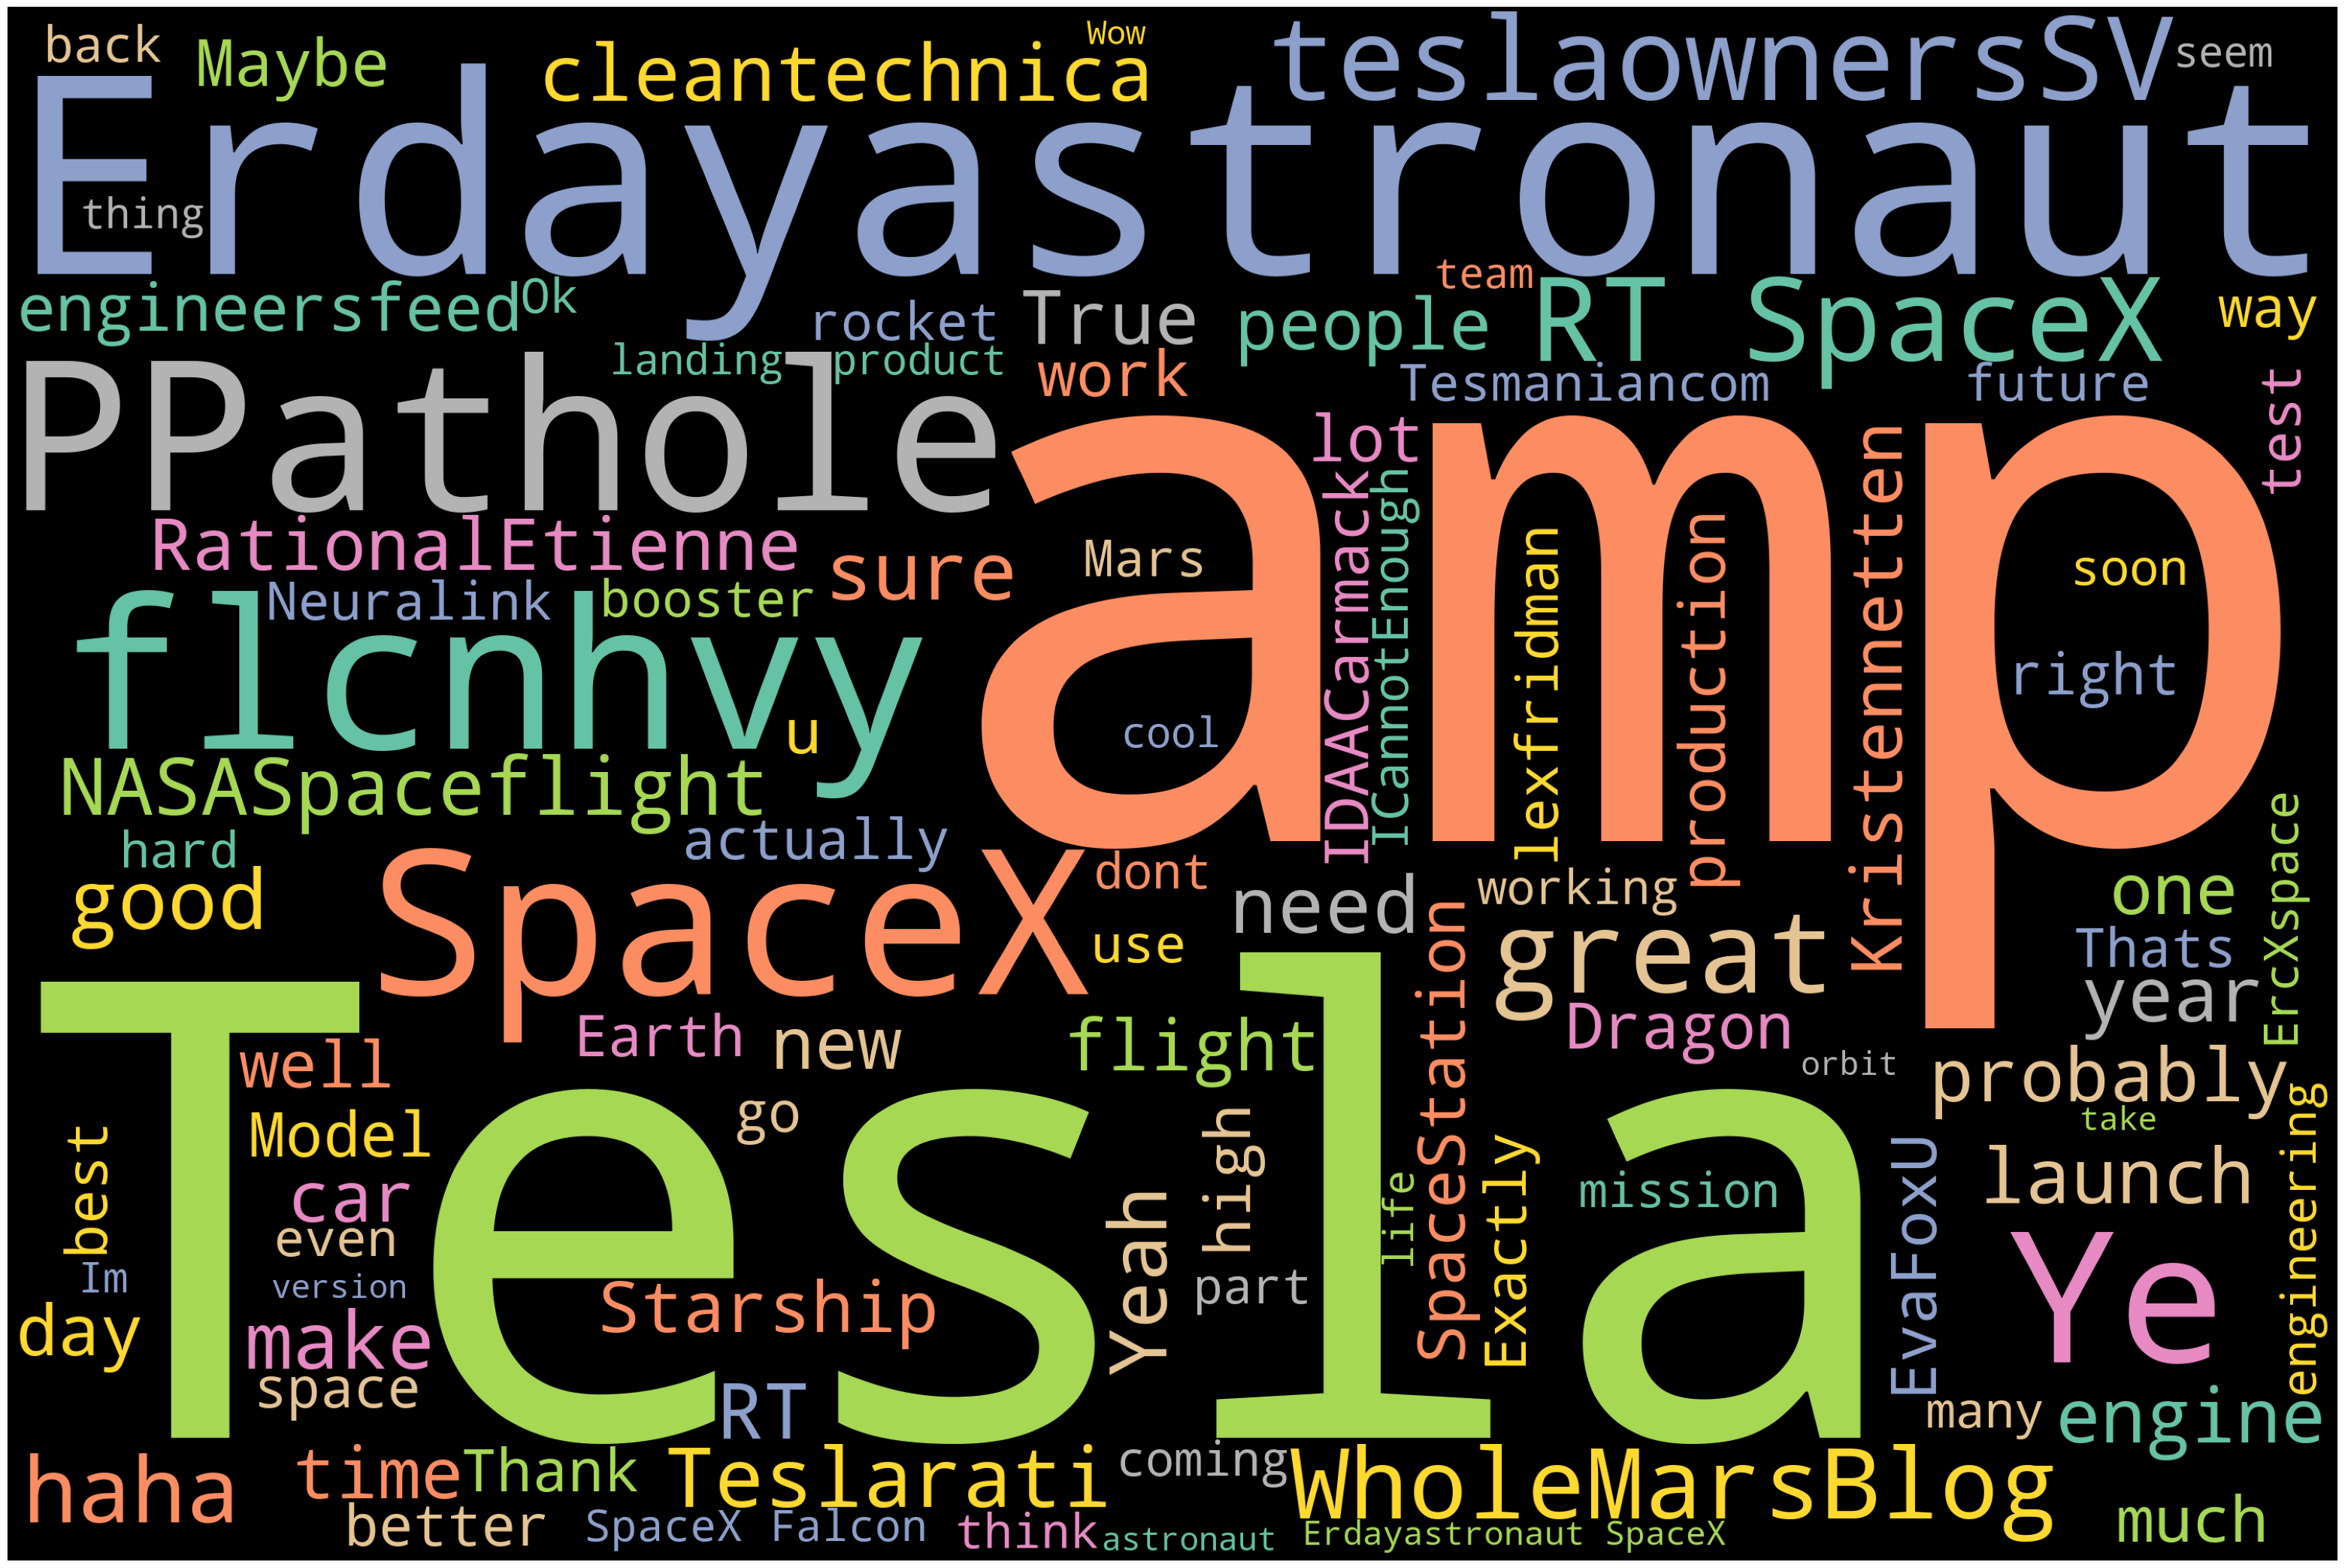

In [102]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

# Sentiment (emotions) analysis using (TextBlob Library)

In [103]:
from textblob import TextBlob
mask['sentiment']=mask['Text'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [104]:
mask

,Text,sentiment
0,Im alien,"(-0.25, 0.75)"
1,IDAACarmack Ray tracing Cyberpunk HDR nextleve...,"(0.0, 0.0)"
2,joerogan Spotify Great interview,"(0.8, 0.75)"
3,Doge underestimated,"(0.0, 0.0)"
4,teslacn Congratulations Tesla China amazing ex...,"(0.20000000000000004, 0.32222222222222224)"
...,...,...
1994,flcnhvy True sounds surreal negative propagand...,"(0.1111111111111111, 0.5083333333333334)"
1995,PPathole Make sure read ur terms amp condition...,"(0.5, 0.8888888888888888)"
1996,TeslaGong PPathole Samwise Gamgee,"(0.0, 0.0)"
1997,PPathole Altho Dumb Dumber,"(-0.375, 0.5)"


In [105]:
sentiment_series = mask['sentiment'].tolist()
sentiment_series

[Sentiment(polarity=-0.25, subjectivity=0.75),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.8, subjectivity=0.75),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.20000000000000004, subjectivity=0.32222222222222224),
 Sentiment(polarity=0.4681818181818182, subjectivity=0.7272727272727273),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.2, subjectivity=0.25),
 Sentiment(polarity=0.0, subjectivity=0.5),
 Sentiment(polarity=0.25, subjectivity=0.85),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.2, subjectivity=0.30000000000000004),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.08, subjectivity=0.52),
 Sentiment(polarity=0.2, subjectivity=0.2),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.0, subjectivity=0.0),
 Sentiment(polarity=0.275, subjectivity=0.475),
 Sentiment(polarity=0.0, subj

In [106]:
columns = ['polarity', 'subjectivity']
df = pd.DataFrame(sentiment_series, columns=columns, index=mask.index)
df

,polarity,subjectivity
0,-0.250000,0.750000
1,0.000000,0.000000
2,0.800000,0.750000
3,0.000000,0.000000
4,0.200000,0.322222
...,...,...
1994,0.111111,0.508333
1995,0.500000,0.888889
1996,0.000000,0.000000
1997,-0.375000,0.500000


In [107]:
Elon_musk=pd.concat([mask,df],axis=1)
Elon_musk

,Text,sentiment,polarity,subjectivity
0,Im alien,"(-0.25, 0.75)",-0.250000,0.750000
1,IDAACarmack Ray tracing Cyberpunk HDR nextleve...,"(0.0, 0.0)",0.000000,0.000000
2,joerogan Spotify Great interview,"(0.8, 0.75)",0.800000,0.750000
3,Doge underestimated,"(0.0, 0.0)",0.000000,0.000000
4,teslacn Congratulations Tesla China amazing ex...,"(0.20000000000000004, 0.32222222222222224)",0.200000,0.322222
...,...,...,...,...
1994,flcnhvy True sounds surreal negative propagand...,"(0.1111111111111111, 0.5083333333333334)",0.111111,0.508333
1995,PPathole Make sure read ur terms amp condition...,"(0.5, 0.8888888888888888)",0.500000,0.888889
1996,TeslaGong PPathole Samwise Gamgee,"(0.0, 0.0)",0.000000,0.000000
1997,PPathole Altho Dumb Dumber,"(-0.375, 0.5)",-0.375000,0.500000


In [108]:
Elon_musk.loc[Elon_musk['polarity']>=0.3,'Sentiment']='Positive'
Elon_musk.loc[Elon_musk['polarity']<0.3,'Sentiment']='Negative'

In [109]:
Elon_musk

,Text,sentiment,polarity,subjectivity,Sentiment
0,Im alien,"(-0.25, 0.75)",-0.250000,0.750000,Negative
1,IDAACarmack Ray tracing Cyberpunk HDR nextleve...,"(0.0, 0.0)",0.000000,0.000000,Negative
2,joerogan Spotify Great interview,"(0.8, 0.75)",0.800000,0.750000,Positive
3,Doge underestimated,"(0.0, 0.0)",0.000000,0.000000,Negative
4,teslacn Congratulations Tesla China amazing ex...,"(0.20000000000000004, 0.32222222222222224)",0.200000,0.322222,Negative
...,...,...,...,...,...
1994,flcnhvy True sounds surreal negative propagand...,"(0.1111111111111111, 0.5083333333333334)",0.111111,0.508333,Negative
1995,PPathole Make sure read ur terms amp condition...,"(0.5, 0.8888888888888888)",0.500000,0.888889,Positive
1996,TeslaGong PPathole Samwise Gamgee,"(0.0, 0.0)",0.000000,0.000000,Negative
1997,PPathole Altho Dumb Dumber,"(-0.375, 0.5)",-0.375000,0.500000,Negative


In [110]:
# finally to analysing the tweets apply the sentiments for each tweet
Final_preview=Elon_musk.loc[:,['Text','Sentiment']]
Final_preview

,Text,Sentiment
0,Im alien,Negative
1,IDAACarmack Ray tracing Cyberpunk HDR nextleve...,Negative
2,joerogan Spotify Great interview,Positive
3,Doge underestimated,Negative
4,teslacn Congratulations Tesla China amazing ex...,Negative
...,...,...
1994,flcnhvy True sounds surreal negative propagand...,Negative
1995,PPathole Make sure read ur terms amp condition...,Positive
1996,TeslaGong PPathole Samwise Gamgee,Negative
1997,PPathole Altho Dumb Dumber,Negative


## Extract reviews of any product from ecommerce website like amazon ,Perform emotion mining

In [111]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline 

In [112]:
book=pd.read_csv('apple.txt',error_bad_lines=False)

C:\Users\kjlja\AppData\Local\Temp\ipykernel_18180\2708442740.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv('apple.txt',error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [113]:
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book[0:10]

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders",
 "Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by wo

In [114]:
##Part Of Speech Tagging
nlp = spacy.load('en_core_web_sm')

In [115]:
one_block = book[10]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True) 

In [116]:
one_block

"Hi, Think thousand time before buying. One calm night i was cuddling in jaipuri blanket while enjoying youtube on this expensive machine. Cold night and little excitement created electrostatic charge which spike though spaceBar button. that's how it went to deep sleep forever. Nothing can bring it back and i am in no mood in spending another fortune on this machine. Apple, of you (i)care, this is the least of security feature included in all electronic devices. And the best part, it was a week after Warranty expiration date."

In [117]:
for token in doc_block[0:10]:
    print(token, token.pos_) 

Hi INTJ
, PUNCT
Think VERB
thousand NUM
time NOUN
before ADP
buying VERB
. PUNCT
One NUM
calm ADJ


In [118]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[5:25]) 

['blanket', 'enjoying', 'youtube', 'machine', 'night', 'excitement', 'created', 'charge', 'spike', 'button', 'went', 'sleep', 'bring', 'mood', 'spending', 'fortune', 'machine', 'security', 'feature', 'included']


# WordCloud

In [119]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off"); 

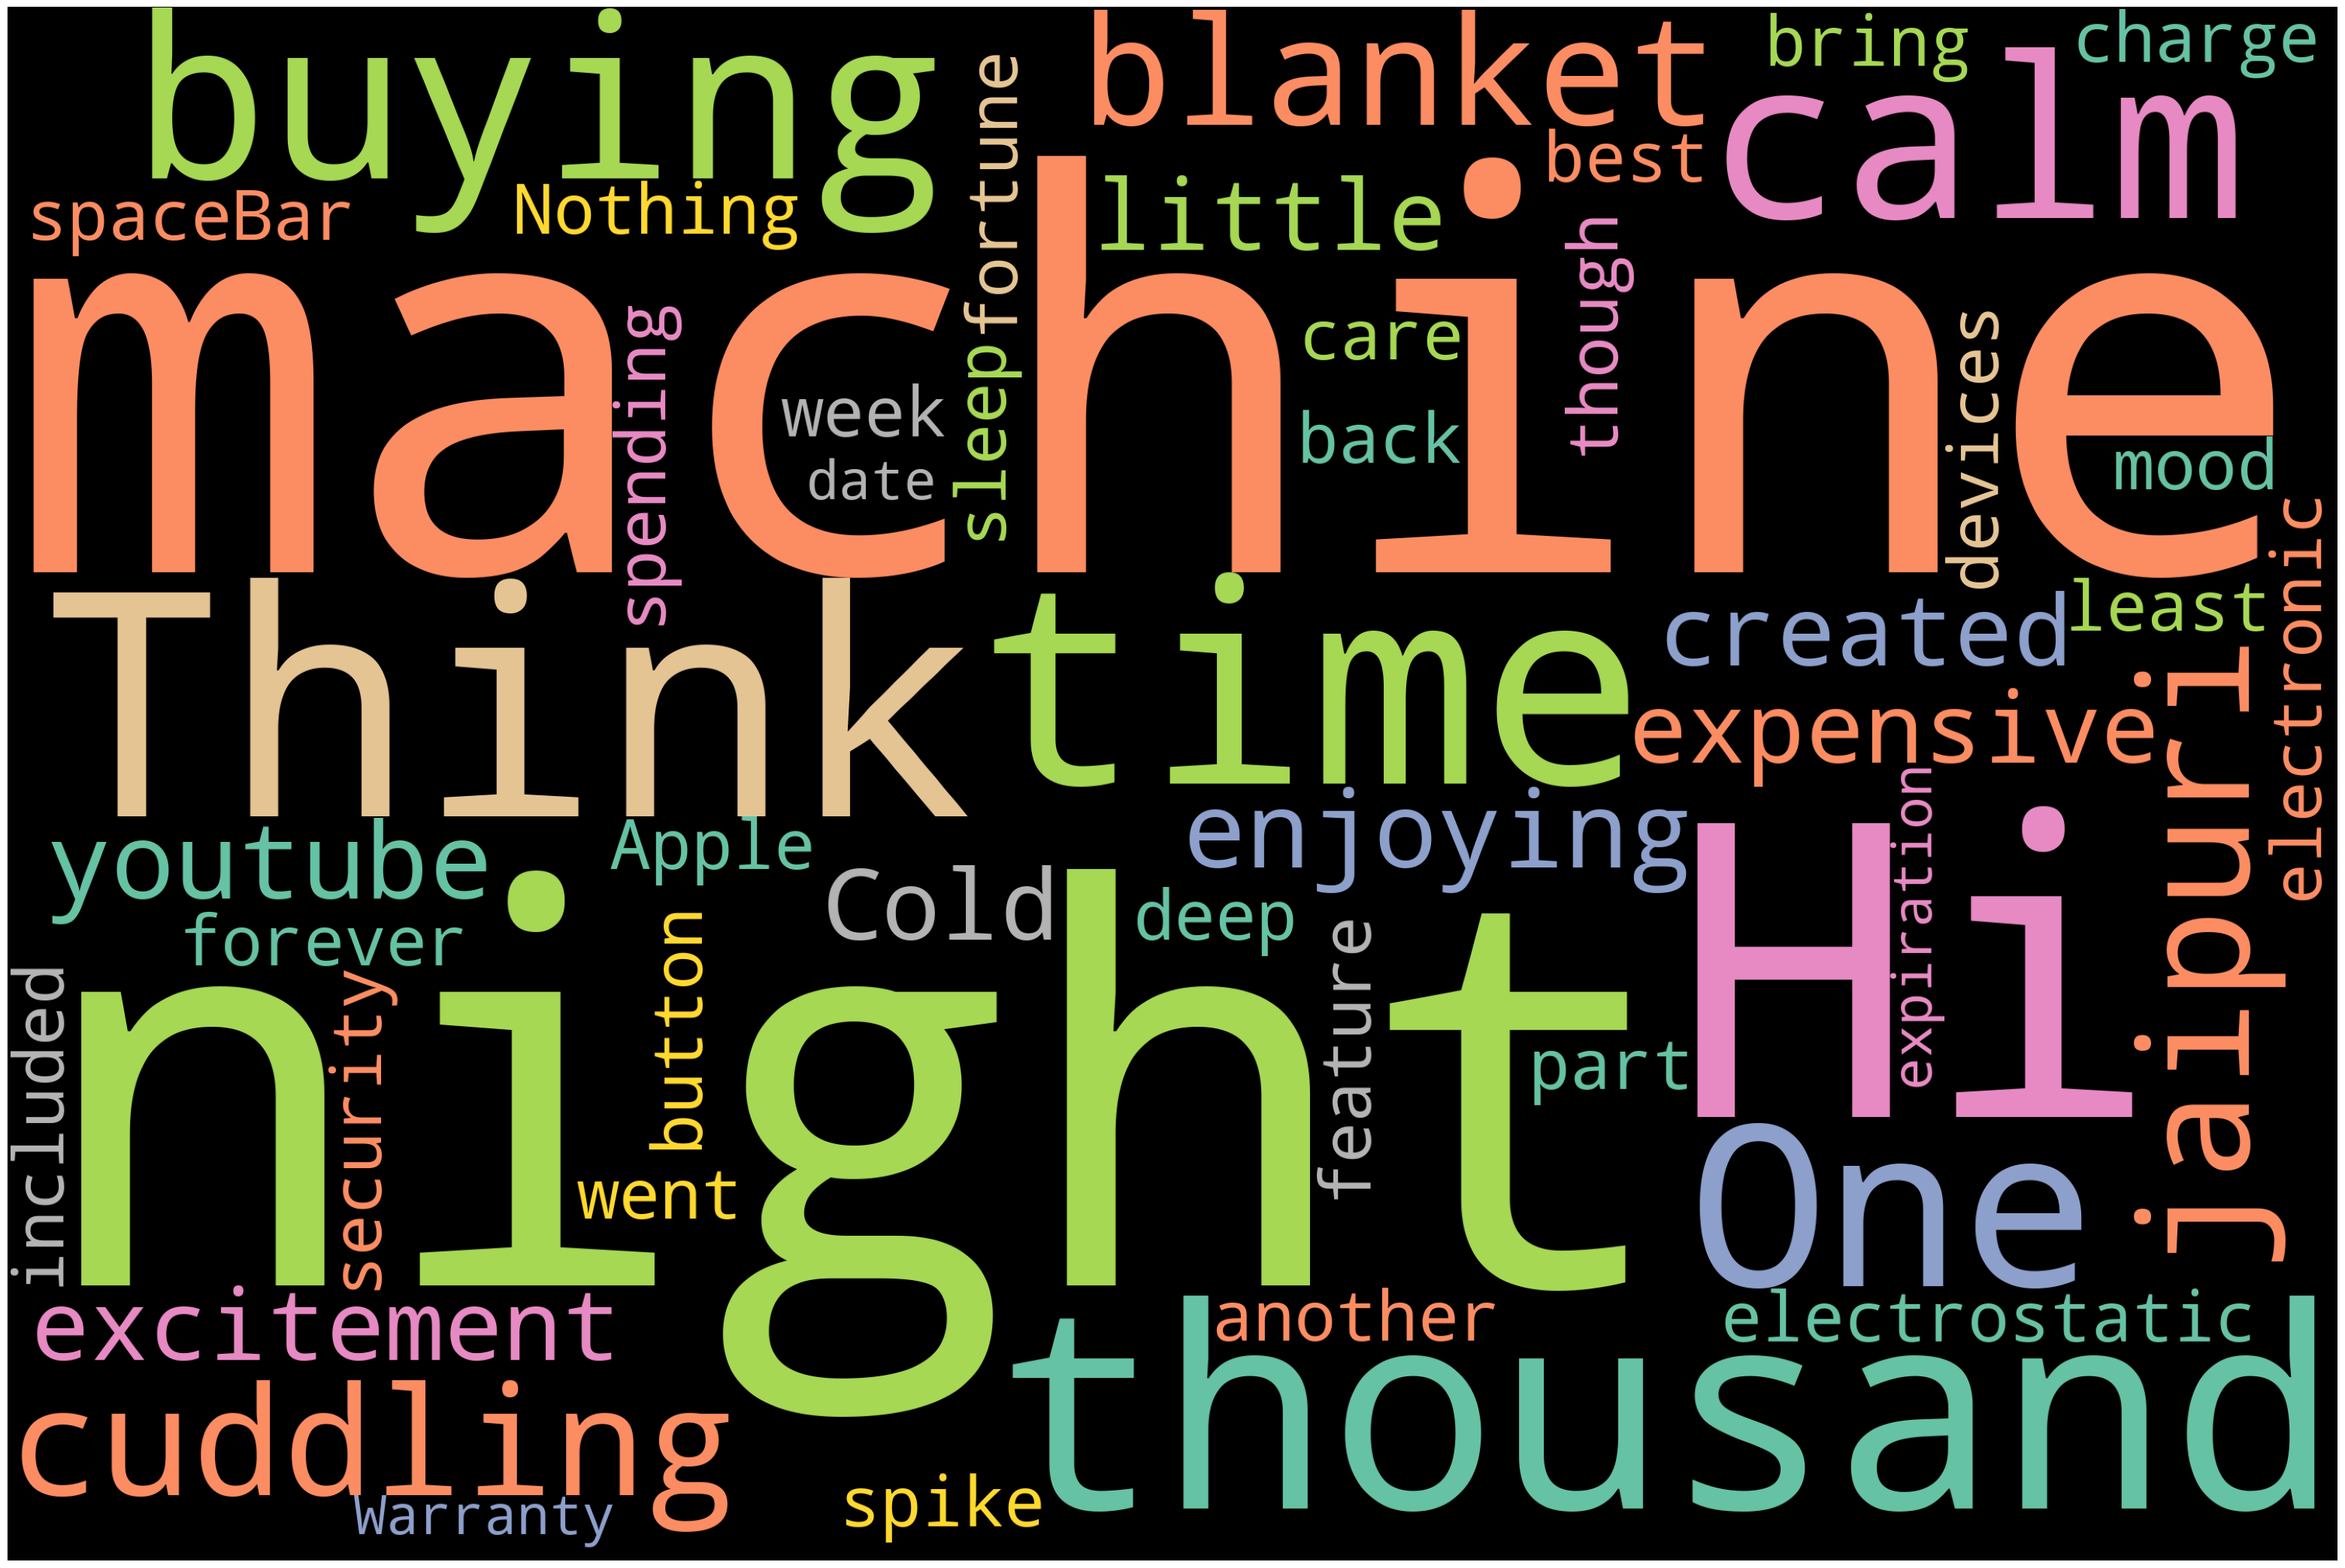

In [120]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=500,colormap='Set2',stopwords=stopwords).generate(one_block)
# Plot
plot_cloud(wordcloud)

In [121]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10] 

,word,count
0,night,2
1,machine,2
2,think,1
3,time,1
4,buying,1
5,cuddling,1
6,blanket,1
7,enjoying,1
8,youtube,1
9,excitement,1


### Visualizing results

<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

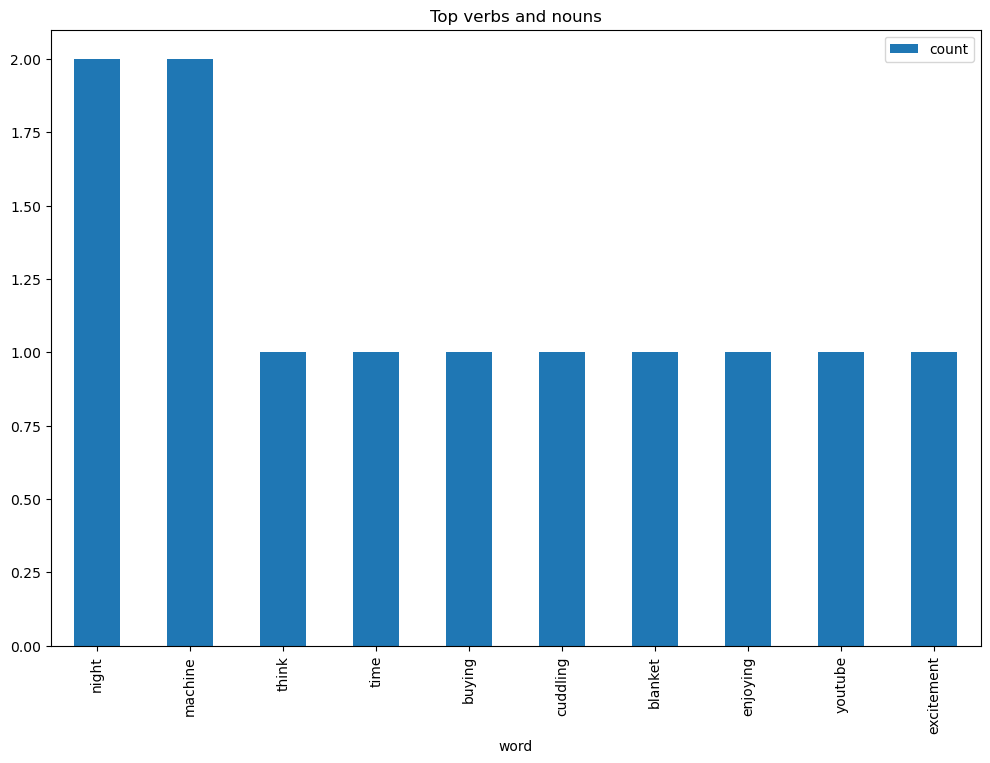

In [122]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns') 

# sentimental analysis

In [123]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [124]:
afinn.shape

(2477, 2)

In [125]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
book=pd.read_csv('apple.txt',error_bad_lines=False)
book = [x.strip() for x in book.x] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False 

C:\Users\kjlja\AppData\Local\Temp\ipykernel_18180\3835752787.py:12: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv('apple.txt',error_bad_lines=False)
b'Skipping line 6: expected 1 fields, saw 14\n'


In [126]:
import nltk
nltk.download('punkt')
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(book))
sentences[5:15] 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kjlja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you master it by working on these (still mostly the document and slides either do not open in windows environment or have distortion issues).",
 'you need to spend extra for an external CD writer and tp buy a carry bag.',
 'Mac con not be connected to most of the projectors unless you buy some connectors, which are expensive and theres no clarity which one to buy and from where.',
 "you can't connect it to your TV, the ports are different and again theres no clarity - customer support, manuals or help section are silent !",
 'Marketing strategy for Indian market, if at all has been planned, has been very bad.',
 'If these critical issues (and a few more not mentioned here) are handled properly, the Mac can sweep away other laptops in India.',
 "Presently, it doesn't seem to be happening.Overall V

In [127]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df 

,sentence
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
182,You can get one of the best movie experiences ...
183,Overall I would it a 4.5/5.
184,"I got a great deal on this laptop, which I hav..."
185,I got it not only on discount but also was abl...


In [128]:
affinity_scores = afinn.set_index('word')['value'].to_dict() 

In [129]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [130]:
# test that it works
calculate_sentiment(text = 'amazing') 

4

In [131]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment) 

In [132]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10) 

0    17
1     7
2    31
3     7
4    65
5     7
6    47
7    16
8    29
9    26
Name: word_count, dtype: int64

In [133]:
sent_df 

,sentence,sentiment_value,word_count
0,It's amazing..... battery last around 10 -12 h...,7,17
1,Got it in 50k in Diwali sale.,0,7
2,Technically good laptop.Good News.luxury produ...,5,31
3,Terrific sense of possession & pride.Bad News.,4,7
4,Problems will be there if you are switching fr...,-11,65
...,...,...,...
182,You can get one of the best movie experiences ...,3,12
183,Overall I would it a 4.5/5.,0,6
184,"I got a great deal on this laptop, which I hav...",3,18
185,I got it not only on discount but also was abl...,0,18


In [134]:
sent_df.sort_values(by='sentiment_value').tail(10) 

,sentence,sentiment_value,word_count
106,I am satisfied to get the marvel of a tech in ...,5,13
110,"The build is super strong, the operating syste...",5,10
45,Now my mac is perfectly fine : Got the Apple M...,5,27
46,Ships with macOS sierra but update is availabl...,6,86
64,I hope this comment can help to save somebody’...,6,10
103,The switch was inspired by the awesome reviews...,6,13
59,I use this for music production and it works a...,7,30
0,It's amazing..... battery last around 10 -12 h...,7,17
151,..So now I m working with the external keyboar...,17,113
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


In [135]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    187.000000
mean       0.930481
std        3.350571
min      -11.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       24.000000
Name: sentiment_value, dtype: float64

In [136]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
1,Got it in 50k in Diwali sale.,0,7
4,Problems will be there if you are switching fr...,-11,65
5,"), all printers are not compatible (e.g.",0,7
7,you need to spend extra for an external CD wri...,0,16
10,"Marketing strategy for Indian market, if at al...",-3,15


In [137]:
sent_df[sent_df['sentiment_value']>=20].head() 

,sentence,sentiment_value,word_count
86,"All are Gud.. For now.. Apple,apple,apple, tha...",24,184


C:\Users\kjlja\Userskjlj\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

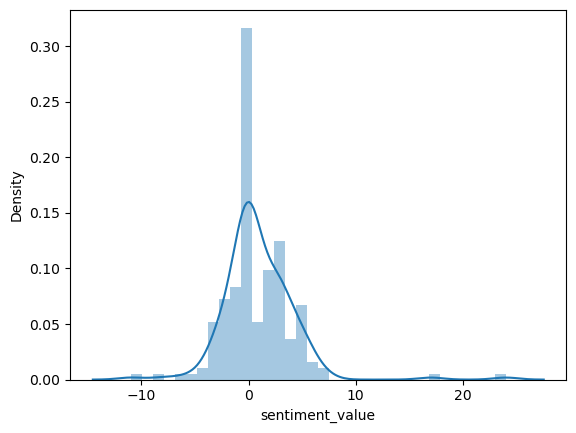

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

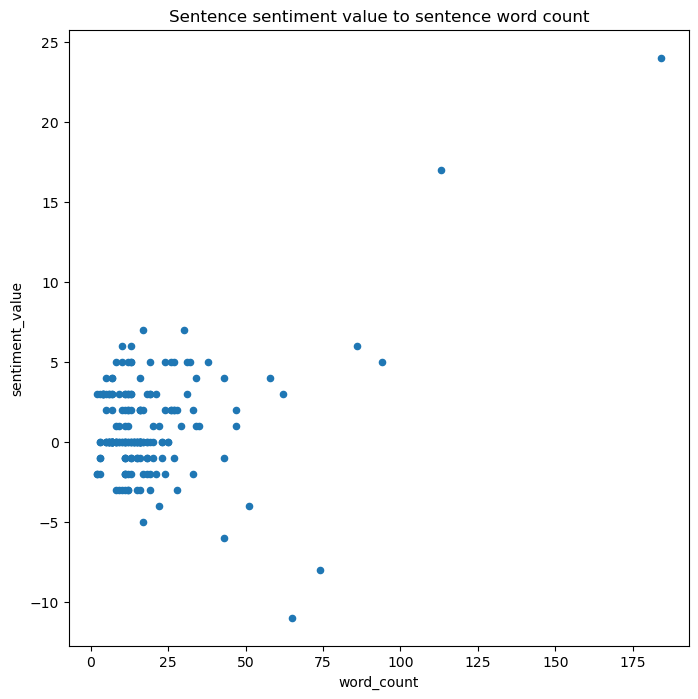

In [139]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')